# Time Zero Analysis and Correction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
import datetime
import pandas as pd
import sys
sys.path.append('packages')
import warnings
import random as rdm
from tqdm import tqdm
from scipy import signal
import scipy.interpolate as interp
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
from matplotlib.colors import TwoSlopeNorm
from scipy.ndimage import gaussian_filter1d
warnings.simplefilter("ignore")

## Loading in Data

__s1__

In [63]:
dI_1 = np.loadtxt("data_files/dI_s1_0-500_12-18-2023.txt")
s_1 = np.loadtxt("data_files/s_s1_0-500_12-18-2023.txt")
t_1 = np.loadtxt("data_files/realtime_s1_0-500_12-18-2023.txt")
stage_1 = np.loadtxt("data_files/stage_s1_0-500_12-18-2023.txt")

dI_2 = np.loadtxt("data_files/dI_s1_500-1000_12-18-2023.txt")
s_2 = np.loadtxt("data_files/s_s1_500-1000_12-18-2023.txt")
t_2 = np.loadtxt("data_files/realtime_s1_500-1000_12-18-2023.txt")
stage_2 = np.loadtxt("data_files/stage_s1_500-1000_12-18-2023.txt")

dI_3 = np.loadtxt("data_files/dI_s1_1000-1500_12-18-2023.txt")
s_3 = np.loadtxt("data_files/s_s1_1000-1500_12-18-2023.txt")
t_3 = np.loadtxt("data_files/realtime_s1_1000-1500_12-18-2023.txt")
stage_3 = np.loadtxt("data_files/stage_s1_1000-1500_12-04-2023.txt")

dI_4 = np.loadtxt("data_files/dI_s1_1500-end_12-18-2023.txt")
s_4 = np.loadtxt("data_files/s_s1_1500-end_12-18-2023.txt")
t_4 = np.loadtxt("data_files/realtime_s1_1500-end_12-18-2023.txt")
stage_4 = np.loadtxt("data_files/stage_s1_1500-end_12-18-2023.txt")

__s4__

In [18]:
dI_1 = np.loadtxt("data_files/dI_s4_0-1000_12-18-2023.txt")
s_1 = np.loadtxt("data_files/s_s4_0-1000_12-18-2023.txt")
t_1 = np.loadtxt("data_files/realtime_s4_0-1000_12-18-2023.txt")
stage_1 = np.loadtxt("data_files/stage_s4_0-1000_12-18-2023.txt")

dI_2 = np.loadtxt("data_files/dI_s4_1000-2000_12-18-2023.txt")
s_2 = np.loadtxt("data_files/s_s4_1000-2000_12-18-2023.txt")
t_2 = np.loadtxt("data_files/realtime_s4_1000-2000_12-18-2023.txt")
stage_2 = np.loadtxt("data_files/stage_s4_1000-2000_12-18-2023.txt")

dI_3 = np.loadtxt("data_files/dI_s4_2000-3000_12-18-2023.txt")
s_3 = np.loadtxt("data_files/s_s4_2000-3000_12-18-2023.txt")
t_3 = np.loadtxt("data_files/realtime_s4_2000-3000_12-18-2023.txt")
stage_3 = np.loadtxt("data_files/stage_s4_2000-3000_12-18-2023.txt")

dI_4 = np.loadtxt("data_files/dI_s4_3000-4000_12-18-2023.txt")
s_4 = np.loadtxt("data_files/s_s4_3000-4000_12-18-2023.txt")
t_4 = np.loadtxt("data_files/realtime_s4_3000-4000_12-18-2023.txt")
stage_4 = np.loadtxt("data_files/stage_s4_3000-4000_12-18-2023.txt")

In [64]:
print(dI_1.shape)
print(dI_2.shape)
print(dI_3.shape)
print(dI_4.shape)

(37, 463)
(37, 463)
(37, 464)
(37, 463)


In [65]:
# dI_1 = dI_1.T
# dI_1 = dI_1[:451]
# dI_1 = dI_1.T

# dI_2 = dI_2.T
# dI_2 = dI_2[:451]
# dI_2 = dI_2.T

dI_3 = dI_3.T
dI_3 = dI_3[:463]
dI_3 = dI_3.T

# dI_4 = dI_4.T
# dI_4 = dI_4[:451]
# dI_4 = dI_4.T

## Combining Data -- Index

In [20]:
idx_1 = np.arange(0, 37)
idx_2 = np.arange(-2, 35)
idx_3 = np.arange(1, 38)
idx_4 = np.arange(2, 39) 

In [21]:
stage_temp = np.concatenate((stage_1, stage_2, stage_3, stage_4), axis=0) 
t_temp = np.concatenate((t_1, t_2, t_3, t_4), axis=0)
s_temp = np.concatenate((s_1, s_2, s_3, s_4), axis=0)
dI_temp = np.concatenate((dI_1, dI_2, dI_3, dI_4), axis=0)
idx_temp = np.concatenate((idx_1, idx_2, idx_3, idx_4), axis=0)
print(idx_temp)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 -2 -1  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37  2  3  4  5  6  7  8  9 10
 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38]


In [144]:
uni_idx = np.unique(idx_temp) 
print(len(uni_idx))
uni_time = np.unique(t_temp)

41


TypeError: Dimensions of C (41, 464) should be one smaller than X(464) and Y(37) while using shading='flat' see help(pcolor)

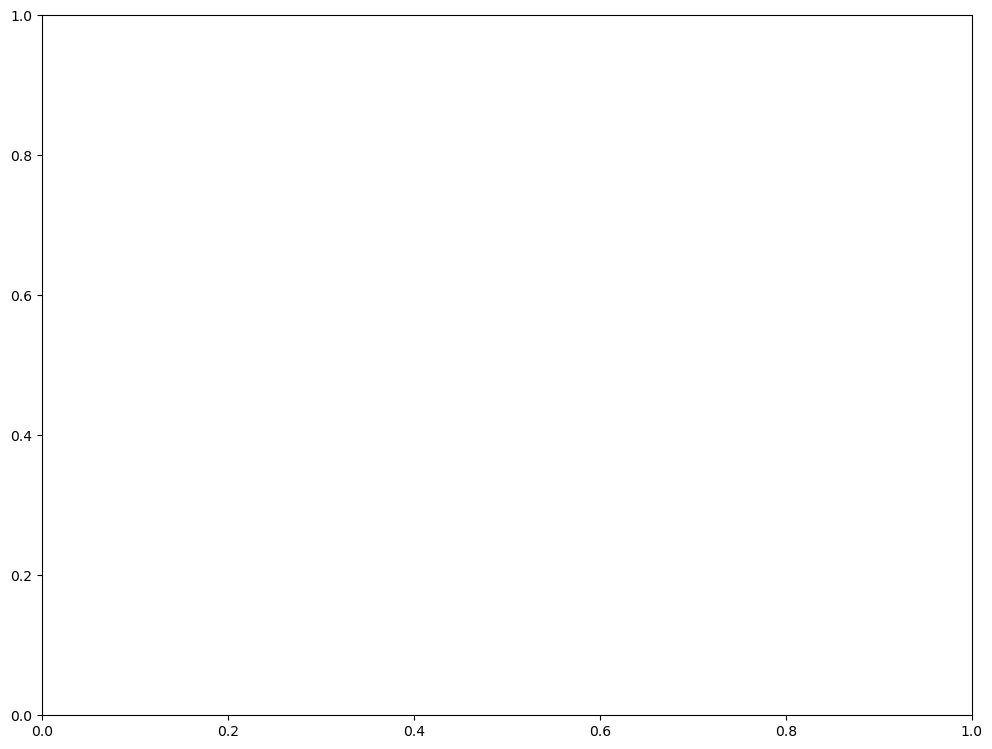

In [146]:
angs = '\u00C5';
s_cali = 0.0225

RoI_1 = [2.7, 3.6];
RoI_2 = [3.9, 4.7];

plt.figure(figsize=(12,20))
plt.subplot(2,1,1)
plt.pcolor(s_1,uni_time,ave_data,cmap='bwr');
plt.clim(vmin=-0.03, vmax=0.03);
plt.colorbar()
plt.axvline(x = RoI_1[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_1[1], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_2[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_2[1], color = 'k', linestyle = '-',linewidth=1);
plt.ylim(-0.5, 2)
plt.xlim(2,7)
plt.xlabel(r'S, ['+angs+'$^{-1}$]');plt.ylabel('Delay [ps]');
plt.title('Falsecolor map ΔI/I')

plt.subplot(2,1,2)

print(round(RoI_1[0]/0.0215))
Inte_1 = ave_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].mean(axis=1);
std_1 = ave_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].std(axis=1)
Inte_2 = ave_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].mean(axis=1);
std_2 = ave_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].std(axis=1);
plt.subplot(2,1,2)
plt.errorbar(uni_time,Inte_1, yerr=std_1,  fmt='-o',  label=str(RoI_1)+' '+angs);
plt.errorbar(uni_time,Inte_2, yerr=std_2,  fmt='-o', label=str(RoI_2)+' '+angs);
plt.xlim(-1, 2)
plt.legend()
plt.xlabel('Integrated Yield [arb.]');plt.xlabel('Delay [ps]');plt.title('ΔI/I of Select Features')

plt.show()

## Combining Data -- Stage

In [66]:
stage_1[2:25] = stage_1[2:25]

stage_2[2:25] = stage_2[2:25] - 0.01

stage_3[2:25] = stage_3[2:25] - 0.02

stage_4[2:25] = stage_4[2:25] - 0.02

In [67]:
print(stage_1)
print(stage_2)
print(stage_3)
print(stage_4)

[108.   108.01 108.6  108.61 108.62 108.63 108.64 108.65 108.66 108.67
 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75 108.76 108.77
 108.78 108.79 108.8  108.81 108.82 108.85 108.88 108.91 108.94 108.97
 109.05 109.2  109.35 109.5  110.17 111.67 116.17]
[108.   108.01 108.59 108.6  108.61 108.62 108.63 108.64 108.65 108.66
 108.67 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75 108.76
 108.77 108.78 108.79 108.8  108.81 108.85 108.88 108.91 108.94 108.97
 109.05 109.2  109.35 109.5  110.17 111.67 116.17]
[108.   108.01 108.58 108.59 108.6  108.61 108.62 108.63 108.64 108.65
 108.66 108.67 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75
 108.76 108.77 108.78 108.79 108.8  108.85 108.88 108.91 108.94 108.97
 109.05 109.2  109.35 109.5  110.17 111.67 116.17]
[108.   108.01 108.58 108.59 108.6  108.61 108.62 108.63 108.64 108.65
 108.66 108.67 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75
 108.76 108.77 108.78 108.79 108.8  108.85 108.88 108.91 108.94 10

In [68]:
stage_temp = np.concatenate((stage_4, stage_3, stage_2, stage_1), axis=0) 
print(stage_temp)
s_temp = np.concatenate((s_4, s_3, s_2, s_1), axis=0)
dI_temp = np.concatenate((dI_4, dI_3, dI_2, dI_1), axis=0)
#print(np.where(stage_temp==108.)[0])

[108.   108.01 108.58 108.59 108.6  108.61 108.62 108.63 108.64 108.65
 108.66 108.67 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75
 108.76 108.77 108.78 108.79 108.8  108.85 108.88 108.91 108.94 108.97
 109.05 109.2  109.35 109.5  110.17 111.67 116.17 108.   108.01 108.58
 108.59 108.6  108.61 108.62 108.63 108.64 108.65 108.66 108.67 108.68
 108.69 108.7  108.71 108.72 108.73 108.74 108.75 108.76 108.77 108.78
 108.79 108.8  108.85 108.88 108.91 108.94 108.97 109.05 109.2  109.35
 109.5  110.17 111.67 116.17 108.   108.01 108.59 108.6  108.61 108.62
 108.63 108.64 108.65 108.66 108.67 108.68 108.69 108.7  108.71 108.72
 108.73 108.74 108.75 108.76 108.77 108.78 108.79 108.8  108.81 108.85
 108.88 108.91 108.94 108.97 109.05 109.2  109.35 109.5  110.17 111.67
 116.17 108.   108.01 108.6  108.61 108.62 108.63 108.64 108.65 108.66
 108.67 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75 108.76
 108.77 108.78 108.79 108.8  108.81 108.82 108.85 108.88 108.91 108.94
 108.9

In [70]:
uni_stage = np.round(np.unique(stage_temp), decimals=3)
stage_temp = stage_temp.round(decimals=3)
print(uni_stage.shape)

(39,)


In [71]:
print("stage positions", stage_1)
print("combined stage positions", uni_stage)

stage positions [108.   108.01 108.6  108.61 108.62 108.63 108.64 108.65 108.66 108.67
 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75 108.76 108.77
 108.78 108.79 108.8  108.81 108.82 108.85 108.88 108.91 108.94 108.97
 109.05 109.2  109.35 109.5  110.17 111.67 116.17]
combined stage positions [108.   108.01 108.58 108.59 108.6  108.61 108.62 108.63 108.64 108.65
 108.66 108.67 108.68 108.69 108.7  108.71 108.72 108.73 108.74 108.75
 108.76 108.77 108.78 108.79 108.8  108.81 108.82 108.85 108.88 108.91
 108.94 108.97 109.05 109.2  109.35 109.5  110.17 111.67 116.17]


In [72]:
%%time
stage_len = len(uni_stage);               #  Number of delays
ave_data = []

for i in range(stage_len):
    #print(uni_stage[i])
    temp_data = dI_temp[np.where(stage_temp==uni_stage[i])[0]];
    #print(temp_data.shape)
    temp_ave= np.nanmean(temp_data,axis=0);
    ave_data.append(temp_ave)


CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 1.72 ms


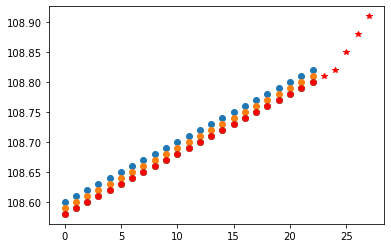

In [73]:
plt.figure()
plt.plot(stage_1[2:25], "o")
plt.plot(stage_2[2:25], "o")
plt.plot(stage_3[2:25], "o")
plt.plot(stage_4[2:25], "o")
plt.plot(uni_stage[2:30], "*r")
plt.show()

In [74]:
ave_data = np.array(ave_data)
ave_data.shape

(39, 463)

In [75]:
posi_0 = 108.63
#posi_0 = 154.405
uni_time = (uni_stage - posi_0)/0.15
print(len(uni_time))

39


## Combining Data -- old

Need to figure out a smarter way to do this

In [83]:
t_temp = np.concatenate((t_1, t_2, t_3, t_4), axis=0) 
s_temp = np.concatenate((s_1, s_2, s_3, s_4), axis=0)
dI_temp = np.concatenate((dI_1, dI_2, dI_3, dI_4), axis=0)

In [84]:
t_temp

array([-4.2       , -4.13333333, -0.2       , -0.13333333, -0.06666667,
        0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
        0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
        1.        ,  1.06666667,  1.13333333,  1.2       ,  1.26666667,
        1.46666667,  1.66666667,  1.86666667,  2.06666667,  2.26666667,
        2.8       ,  3.8       ,  4.8       ,  5.8       , 10.26666667,
       20.26666667, 50.26666667, -4.2       , -4.13333333, -0.2       ,
       -0.13333333, -0.06666667,  0.        ,  0.06666667,  0.13333333,
        0.2       ,  0.26666667,  0.33333333,  0.4       ,  0.46666667,
        0.53333333,  0.6       ,  0.66666667,  0.73333333,  0.8       ,
        0.86666667,  0.93333333,  1.        ,  1.06666667,  1.13333333,
        1.2       ,  1.26666667,  1.46666667,  1.66666667,  1.86666667,
        2.06666667,  2.26666667,  2.8       ,  3.8       ,  4.8 

In [85]:
uni_time = np.unique(t_temp.round(decimals=3))
uni_time

array([-4.2  , -4.133, -0.2  , -0.133, -0.067,  0.   ,  0.067,  0.133,
        0.2  ,  0.267,  0.333,  0.4  ,  0.467,  0.533,  0.6  ,  0.667,
        0.733,  0.8  ,  0.867,  0.933,  1.   ,  1.067,  1.133,  1.2  ,
        1.267,  1.467,  1.667,  1.867,  2.067,  2.267,  2.8  ,  3.8  ,
        4.8  ,  5.8  , 10.267, 20.267, 50.267])

In [33]:
%%time
time_len = len(uni_time);               #  Number of delays
ave_data = []

for i in range(time_len):
    temp_data = dI_temp[np.where(t_temp==uni_time[i])[0]];
    temp_ave= np.nanmean(temp_data,axis=0);
    ave_data.append(temp_ave)

CPU times: user 4 ms, sys: 1.44 ms, total: 5.44 ms
Wall time: 5.27 ms


<timed exec>:6: RuntimeWarning: Mean of empty slice


In [34]:
ave_data = np.array(ave_data)

In [35]:
ave_data.shape

(93, 463)

## Plot Results

39
129
135


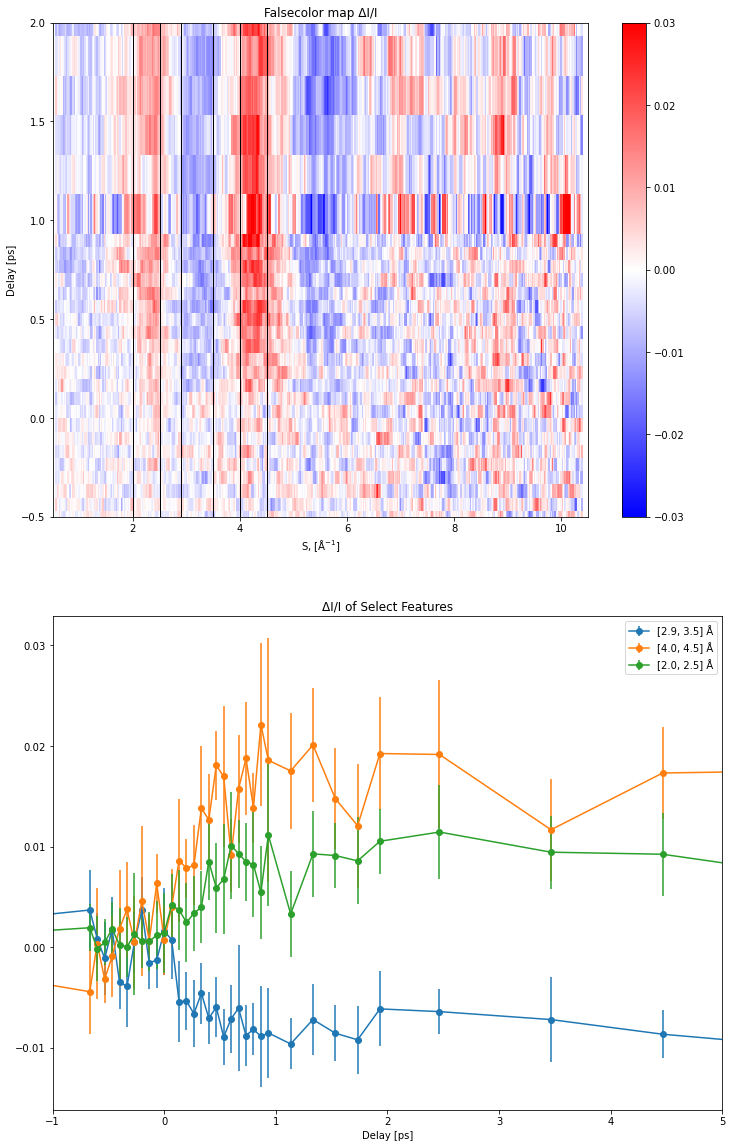

In [85]:
angs = '\u00C5';

posi_0 = 108.68
#posi_0 = 154.405
uni_time = (uni_stage - posi_0)/0.15
print(len(uni_time))

s_cali = 0.0228
RoI_1 = [2.9, 3.5];
RoI_2 = [4.0, 4.5];
RoI_3 = [2.0, 2.5];


print(round(RoI_1[0]/0.0225))
Inte_1 = ave_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].mean(axis=1);
std_1 = ave_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].std(axis=1)
Inte_2 = ave_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].mean(axis=1);
std_2 = ave_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].std(axis=1);
Inte_3 = ave_data[:,round(RoI_3[0]/s_cali):round(RoI_3[1]/s_cali)].mean(axis=1);
std_3 = ave_data[:,round(RoI_3[0]/s_cali):round(RoI_3[1]/s_cali)].std(axis=1);

plt.figure(figsize=(12,20))
plt.subplot(2,1,1)
plt.pcolor(s_1,uni_time,ave_data,cmap='bwr');
plt.clim(vmin=-0.03, vmax=0.03);
plt.colorbar()
plt.axvline(x = RoI_1[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_1[1], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_2[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_2[1], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_3[0], color = 'k', linestyle = '-',linewidth=1);
plt.axvline(x = RoI_3[1], color = 'k', linestyle = '-',linewidth=1);
plt.ylim(-0.5, 2)
plt.xlim(0.5,10.5)
plt.xlabel(r'S, ['+angs+'$^{-1}$]');plt.ylabel('Delay [ps]');
plt.title('Falsecolor map ΔI/I')

plt.subplot(2,1,2)

print(round(RoI_1[0]/0.0215))
Inte_1 = ave_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].mean(axis=1);
std_1 = ave_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].std(axis=1)
Inte_2 = ave_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].mean(axis=1);
std_2 = ave_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].std(axis=1);
Inte_3 = ave_data[:,round(RoI_3[0]/s_cali):round(RoI_3[1]/s_cali)].mean(axis=1);
std_3 = ave_data[:,round(RoI_3[0]/s_cali):round(RoI_3[1]/s_cali)].std(axis=1);
plt.subplot(2,1,2)
plt.errorbar(uni_time,Inte_1, yerr=std_1,  fmt='-o',  label=str(RoI_1)+' '+angs);
plt.errorbar(uni_time,Inte_2, yerr=std_2,  fmt='-o', label=str(RoI_2)+' '+angs);
plt.errorbar(uni_time, Inte_3, yerr = std_3, fmt='-o', label=str(RoI_3)+' '+angs)
plt.xlim(-1, 5)
plt.legend()
plt.xlabel('Integrated Yield [arb.]');plt.xlabel('Delay [ps]');plt.title('ΔI/I of Select Features')

plt.show()

## T0 Fitting

Fit parameters: 
t_0 = 0.2020  ps +-  0.0395  ps
FWHM =  0.5332 ps 0.1244 ps




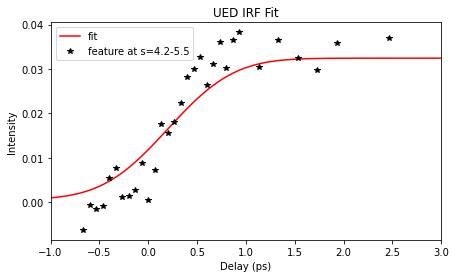

In [86]:
t0_1= Inte_2-Inte_1+Inte_3


A = 0.03
t0 = 0.5
sigma = 0.5
offset = 0.1
x0 = [A, t0, sigma,offset]
# ## when fitting with an error function
import scipy
def equations(t, A, t0, sigma, offset): #def equations
    fit = A*(scipy.special.erf((t-t0)/(np.sqrt(2)*sigma)))+offset
    return fit

def erf_fit(t, A, t0, sigma, offset):
    fit = A* scipy.special.erf(((t-t0)/(sigma/(np.sqrt(2*np.log(2)))))*np.sqrt(2))+offset
    return fit 

# yo = equations(t, A, t0, sigma, offset) #equations
popt, pcov, info, _, _ = curve_fit(erf_fit, uni_time[:25], t0_1[:25], p0 = x0, maxfev = 5000000, method='lm',full_output=True)
t_new = np.linspace(uni_time[0],uni_time[-1],1000)
## error func fit
A, t0, sigma, offset = popt
print("Fit parameters: ")
print("=====================================================")

print("t_0 =", '%1.4f '%(popt[1]),'ps +- ','%1.4f '%np.sqrt(pcov[1,1]),"ps")
print("FWHM = ", '%1.4f'%(popt[2]), 'ps', '%1.4f' %np.sqrt(pcov[2,2]), "ps")

print("\n")
y_new = equations(t_new, *popt)
plt.figure(figsize=(7,4))
# plt.plot(t,yo,color=‘purple’,ls=‘--’)
plt.plot(t_new,y_new,color='red', label="fit")
plt.plot(uni_time, t0_1,'*',color='black', label="feature at s=4.2-5.5")
plt.xlim(-1,3)
plt.xlabel("Delay (ps)")
plt.ylabel("Intensity")
plt.title("UED IRF Fit")
plt.legend()
plt.show()

Find out how to extract a goodness of fit result
Play with parameters and how many data points to fit

In [112]:
sum(np.abs(info['fvec']))

0.044802951378118835

## Gaussian Filtering

In [441]:
def gaussian_filter_2d(data_array, sig=1):
    """Applies the scipy.ndimage.gaussian_filter() on the 2D data array. Returns filtered images"""
    gf_filtered = gaussian_filter(data_array, sig)
    return gf_filtered

In [442]:
gf_data = gaussian_filter_2d(ave_data)

98


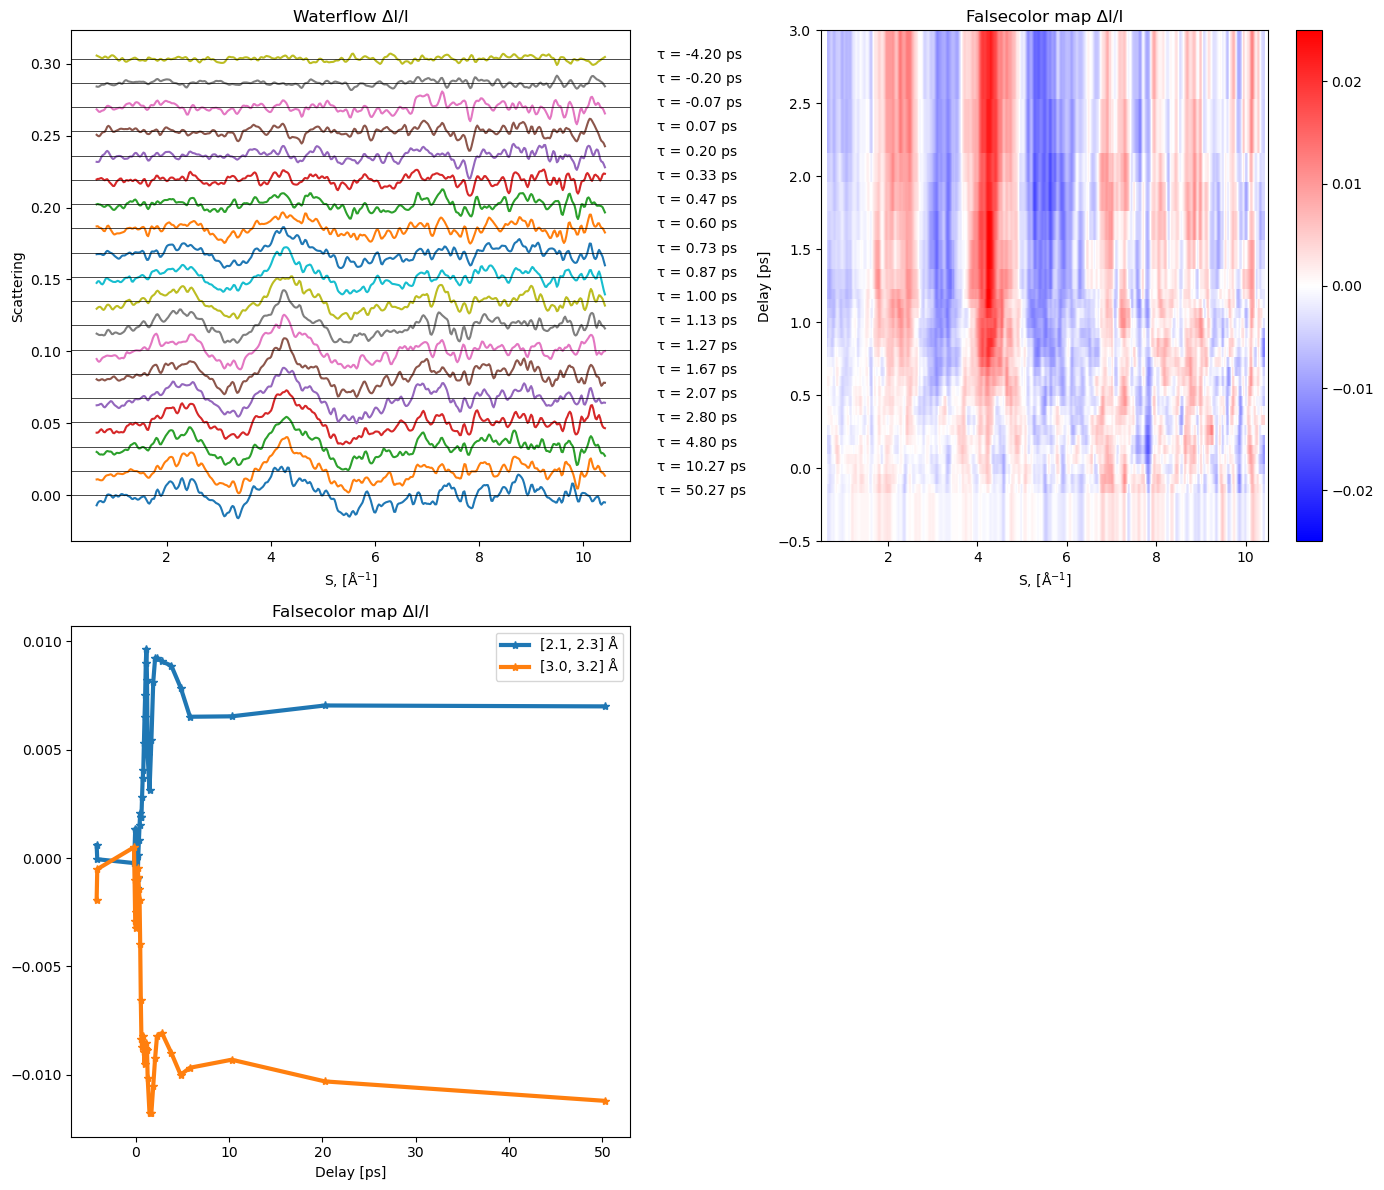

In [454]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
for i in range(stage_len):
    if i%2 == 0:
        plt.plot(s_1,gf_data[stage_len-i-1] + np.nanmax(gf_data)*(i)/3);
        plt.text(s_1[-1]+1,np.nanmax(gf_data)*(i)/3, r'τ = {0:.2f} ps'.format(uni_time[stage_len-i-1]))
        plt.axhline(y = np.nanmax(gf_data)*(i)/3, color = 'k', linestyle = '-',linewidth=0.5);
plt.xlabel(r'S, ['+angs+'$^{-1}$]');
plt.ylabel('Scattering');
plt.title('Waterflow ΔI/I');

plt.subplot(2,2,2)
plt.pcolor(s_1,uni_time,gf_data,cmap='bwr');
plt.clim(vmin=-0.025, vmax=0.025);
plt.colorbar()
plt.xlim(0.5, 10.5)
plt.ylim(-0.5, 3)
plt.xlabel(r'S, ['+angs+'$^{-1}$]');
plt.ylabel('Delay [ps]');
plt.title('Falsecolor map ΔI/I')

plt.subplot(2,2,3)
RoI_1 = [2.1, 2.3];
RoI_2 = [3.0, 3.2];
print(round(RoI_1[0]/0.0215))
Inte_1 = gf_data[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].mean(axis=1);
Inte_2 = gf_data[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].mean(axis=1);
plt.plot(uni_time,Inte_1,'-*',linewidth=3,label=str(RoI_1)+' '+angs);
plt.plot(uni_time,Inte_2,'-*',linewidth=3,label=str(RoI_2)+' '+angs);
plt.legend()
plt.xlabel('Integrated Yield [arb.]');plt.xlabel('Delay [ps]');plt.title('Falsecolor map ΔI/I')

plt.tight_layout()
plt.show()

# plt.tight_layout()
# plt.show()

In [14]:
%pwd

'/home/centurion/lheald2/GUED_Analysis/GUED_Analysis'

## Get PDF

### Loading in Static Structures

In [14]:
#Author: Keke Chen
#Contact: ckk20@mails.tsinghua.edu.cn

def load_static_mol_coor(path_mol, mol_name, file_type):
    filename=path_mol + mol_name + file_type
    if file_type=='.xyz':
        [coor_xyz,atom_sum]=load_xyz_new(filename)
        coor=get_modified_coor_for_xyz(coor_xyz,atom_sum)
        
    if file_type=='.csv':
        mol_filename=mol_name+'.csv'
        coor_M=pd.read_csv(path_mol+mol_filename)
        coor=np.array(coor_M)
        num=np.array(coor[:,3])
        atom_sum=int(len(num))
        coor=get_modified_coor_for_csv(coor,atom_sum)

    elif file_type!='.csv' and file_type!='.xyz':
        print('error! Please type in the right molecular coordinate file type, .xyz or .csv')
        
    return coor,atom_sum

def load_xyz(path_mol,mol_name):  
    mol_filename=mol_name+'.xyz'
    with open(path_mol+mol_filename, 'r') as f:
        a=f.read()
    
    a0=a.split('\n')
    atom_sum=int(a0[0]) 
    #this gives the total atom number described in the first position in a .xyz file
    
    coor_xyz=[0]*(4*atom_sum+2)
    m=0
    
    a1=a.split(' ')
    for i in a1:
        #print(i)
        if i!='':
            coor_xyz[m]=i.replace('\n', '')
            m+=1
    #print(coor_xyz)        
    coor01=np.array(coor_xyz)
    print(coor01)
    coor01=coor01[2:4*atom_sum+2]
    re=coor01.reshape(atom_sum,4)
    #print("re ", re)
    return re,atom_sum

def read_xyz(filename):
    xyz_file = filename
    file = open(xyz_file, 'r')
    text = file.readlines()
    file.close()
    x = []
    y = []
    z = []
    atoms = []
    count = len(text)
    re = []
    for j in range(0, count):
        try:
            string = list(map(str, text[j].split()))
            re.append(string)
            atoms.append(string[0])
            x.append(float(string[1]))
            y.append(float(string[2]))
            z.append(float(string[3]))
        except Exception:
            pass
    return atoms, x, y, z

def load_xyz_new(filename):
    xyz_file = filename
    file = open(xyz_file, 'r')
    text = file.readlines()
    file.close()
    count = len(text)
    re = []
    for j in range(0, count):
        try:
            string = list(map(str, text[j].split()))
            re.append(string)
        except Exception:
            pass    
    atom_sum = re[0]
    atom_sum = int(np.array(atom_sum))
    re = np.array(re[2:])
    return re, atom_sum
    

def get_modified_coor_for_xyz(re,atom_sum):
    #this function is to mark the atom number according to the atom symbol for loaded xyz files
    atom_num=[0 for i in range(atom_sum)]
    for i in range(atom_sum):
        atom_num[i]=sym_to_no(re[i][0])

    atom_num=np.array(atom_num)
    atom_num=atom_num[:,np.newaxis]
    coor=np.hstack((re,atom_num))

    return coor

def get_modified_coor_for_csv(coor_csv,atom_sum):
    #this function is to mark the atom number according to the atom symbol for loaded csv files
    atom_num=[0 for i in range(atom_sum)]
    for i in range(atom_sum):
        atom_num[i]=sym_to_no(coor_csv[i,0])
            
    atom_num=np.array(atom_num)
    atom_num=atom_num[:,np.newaxis]
    coor=np.hstack((coor_csv,atom_num))

    return coor

### Getting Diffraction Scattering Signals

In [16]:
#Author: Keke Chen
#Contact: ckk20@mails.tsinghua.edu.cn

path_dcs= '/home/centurion/lheald2/GUED_Analysis/GUED_Analysis/packages/dcs_repository/3.7MeV/'
#path_dcs = '/sdf/home/l/lheald2/GUED/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/'
table=pd.read_csv(path_dcs+'Periodic_Table.csv')
def import_s():
    qe=1.602176565e-19 
    me=9.10938291e-31
    c=299792458 
    h=6.62606957e-34
    E=3700000*qe+me*c**2 #kinetic energy=3.7MeV
    p=(E**2/c**2-me**2*c**2)**0.5
    lamb=h/p
    k=2*np.pi/lamb #wave vector of the incident electron

    path=path_dcs+'C.dat'
    with open(path,'r') as file:
        a=file.read()
    a0=a.split('\n')
    theta_deg=np.empty(130)
    for i in range(130):
        a31=str(a0[31+i]).split(' ')
        theta_deg[i]=a31[2]
    
    theta=theta_deg*np.pi/180
    S=2*k*np.sin(0.5*theta)
    s=np.array(S)
    return s

def read_dat_dcs(atom_no,path_dcs):
    atom_sym=no_to_sym(atom_no)
    path=path_dcs+atom_sym+'.dat'
    with open(path,'r') as file:
        a=file.read()
    a0=a.split('\n')
    data=np.empty(130)
    for i in range(130):
        a31=str(a0[31+i]).split(' ')
        #print(a31)
        data[i]=a31[8]
    #print(data)
    return data**0.5

def sym_to_no(ele_sym):
    n=np.where(table['Symbol']==ele_sym)
    return int(n[0]+1)

def no_to_sym(ele_no):
    return table['Symbol'][ele_no-1]

def import_DCS(max_at_no):
    f=np.empty((max_at_no+1,130))
    for i in range(max_at_no):
        f[i+1]=read_dat_dcs(i+1,path_dcs)
    return f

### Calculating IAM Pattern

In [17]:
def get_I_from_mol_coor(f,s,s_max,coor,atom_sum): # f is the form factor array
    #this function is to get scattering intensity from molecular coordinates and atom form factors
    b=range(atom_sum)
    
    Lm=125 # Lm confines the maximum of s, for we negelect high angle scattering which has poor signal-noice ratio. 
    # You may change this number in order to compute at higher s
    # this Lm should be no larger than 138
    s0=s[0:Lm]*1e-10 #this is to change the unit into inverse angstrom 
    s1=np.linspace(0,s_max,500)
    
    I=np.zeros(Lm) # total elastic scattering intensity under the approx of IAM
    I_at=np.zeros(Lm) # I_atom under IAM
    I_mol=np.zeros(Lm) # I_molecule under IAM
    R=[0 for i in range(atom_sum**2)]
    m=0
    for i in range(atom_sum):# the case for single atom scattering, which contributes to I_at
        I_at+=np.abs(f[int(coor[i,4]),0:Lm])**2

    
    for i in b:
        for j in b:
            if i!=j: # the case for interatomic interferencing, which contributes to I_mol
                r_ij=((float(coor[i,1])-float(coor[j,1]))**2+(float(coor[i,2])-float(coor[j,2]))**2+(float(coor[i,3])-float(coor[j,3]))**2)**0.5*1e-10
                #if int(coor[i,4])!=1 and int(coor[j,4])!=1:
                 #   R[m]=r_ij
                  #  m+=1
                # distance between atom i and j
                I_mol[0]+=f[int(coor[i,4]),0]*f[int(coor[j,4]),0]
                I_mol[1:Lm]+=f[int(coor[i,4]),1:Lm]*f[int(coor[j,4]),1:Lm]*np.sin(s[1:Lm]*r_ij)/s[1:Lm]/r_ij
    #y=[1 for i in range(len(R))]
    #y=np.array(y)
    #plt.scatter(np.array(R)*1e12,y,s=5)
    #plt.grid()
    #plt.show()

    I=I_at+I_mol


    
    I1=make_interp_spline(s0,I)(s1)
    I_at1=make_interp_spline(s0,I_at)(s1)
    I_mol1=make_interp_spline(s0,I_mol)(s1)

    return I1,I_at1,I_mol1,s1

def get_I_for_exp_from_mol_coor(f,s,s_exp,coor,atom_sum):
    #slightly different from the function get_I_from_mol_coor
    #this function is to simulate I that matches the s from experiments
    b=range(atom_sum)
    Lm=125 # Lm should be no larger than 138
    I=np.zeros(Lm)
    I_at=np.zeros(Lm)
    I_mol=np.zeros(Lm)

    for i in range(atom_sum):
        I_at+=f[int(coor[i,4]),0:Lm]*f[int(coor[i,4]),0:Lm]
    for i in b:
        for j in b:
            if i!=j:
                r_ij=((float(coor[i,1])-float(coor[j,1]))**2+(float(coor[i,2])-float(coor[j,2]))**2+(float(coor[i,3])-float(coor[j,3]))**2)**0.5*1e-10
                # distance between atom i and j
                I_mol[0]+=f[int(coor[i,4]),0]*f[int(coor[j,4]),0]
                I_mol[1:Lm]+=f[int(coor[i,4]),1:Lm]*f[int(coor[j,4]),1:Lm]*np.sin(s[1:Lm]*r_ij)/s[1:Lm]/r_ij
    I=I_at+I_mol
    s0=s[0:Lm]*1e-10

    I1=make_interp_spline(s0,I)(s_exp)
    I_at1=make_interp_spline(s0,I_at)(s_exp)
    I_mol1=make_interp_spline(s0,I_mol)(s_exp)

    return I1,I_at1,I_mol1

def get_sM_and_PDF_from_I(I_at,I_mol,s,r_max,damp_const):
    sM=I_mol/I_at*s #calculate sM from I
    r_max = r_max * 1; # convert to picometer
    r=range(r_max)
    #print(r)
    PDF=[0 for i in range(r_max)]
    for i in range(len(s)-1): 
        PDF+=sM[i]*np.sin(s[i]*1e10*np.array(r)*1e-12)*(s[i+1]-s[i])*np.exp(-s[i]**2/damp_const)
    #for i in range(r_max):
     #   PDF[i]+=sum(sM*np.sin(s*1e10*np.array(r[i])*1e-12)*(s[1]-s[0])*np.exp(-s**2/damp_const))
    return sM,PDF,np.array(r)

def plot_delay_simulation_with_conv(matrix_before_conv,x_range,col,t_interval,nt,space_for_convol):
    x0=np.linspace(-col,col,int(255/t_interval))
    h=np.exp(-x0**2*t_interval**2/8000)/(np.pi*8000/t_interval**2)**0.5 #normalize the gaussian
    M1=get_2d_matrix(x_range,nt+space_for_convol*2)
    for i in range(x_range):
        M1[i]=signal.convolve(matrix_before_conv[:,i],h,mode='same')

    #M1=np.transpose(M1)
    M1 = np.array(M1)
            
    norm=TwoSlopeNorm(vmin=M1.min(),vcenter=0,vmax=M1.max())
    plt.figure(figsize=(15,5))
    pc=plt.imshow(M1[:, 0:nt+space_for_convol-1],norm=norm,cmap=plt.get_cmap('seismic'),alpha=0.65)
    plt.colorbar(pc)
    ax=plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_ticks_position('bottom')
    plt.xlabel('time/fs')
    #plt.xticks(np.arange(0,nt+space_for_convol,100),np.arange(-space_for_convol*t_interval,nt*t_interval,100*t_interval))
    #plt.axhline(y=space_for_convol,linestyle='--')
    plt.grid()
    return

def plot_I_sM_PDF(I,sM,PDF,s,r,title_I,title_sM,title_PDF):
    plt.figure()
    plt.subplot(1,3,1)
    plt.plot(s,I/I.max())
    plt.xlabel('s/angs^-1')
    plt.title(title_I)
    plt.grid()
    
    plt.subplot(1,3,2)    
    plt.plot(s,sM)
    plt.xlabel('s/angs^-1')
    plt.title(title_sM)
    plt.grid()
    
    plt.subplot(1,3,3)    
    plt.plot(r,PDF)
    plt.xlabel('r/pm')
    plt.title(title_PDF)
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    return

def trajectory_sim(path_mol,tra_mol_name,file_type,f,s000,s_max):
    coor_txyz,atom_sum,TIME=load_time_evolving_xyz(path_mol,tra_mol_name,file_type) #load xyz data
    #options: load_time_evolving_xyz, or load_time_evolving_xyz1
    nt=len(TIME)
    t_interval=float(TIME[1])-float(TIME[0])
    col=int(160/t_interval)
    space_for_convol=int(200/t_interval)
        
    [I0,I0_at,I0_mol,s]=get_I_from_mol_coor(f,s000,s_max,coor_txyz[0],atom_sum)
    delta_I_over_I_t=get_2d_matrix(nt+space_for_convol*2,len(s))
    for i in range(nt):
        [I,I_at,I_mol,s]=get_I_from_mol_coor(f,s000,s_max,coor_txyz[i],atom_sum)
        delta_I_over_I_t[i+space_for_convol]=(I-I0)/I
    for i in range(space_for_convol):
        delta_I_over_I_t[i+nt+space_for_convol]=delta_I_over_I_t[nt+space_for_convol-1]
    delta_I_over_I_t=np.array(delta_I_over_I_t)
    plot_delay_simulation_with_conv(delta_I_over_I_t*100,len(s),col,t_interval,nt,space_for_convol)
    #this simulation assumes full dissociation
    #after taking dissociation percentage into consideration, the change in signal is much smaller
    plt.ylabel('s/angs^-1')
    plt.yticks(np.arange(0,len(s),len(s)/s.max()),np.arange(0,s.max(),1))
    plt.axvline(x=space_for_convol,linestyle='--')
    plt.title('delta_I/I %')
    plt.show()
    return

def freq_sim(path_mol,tra_mol_name,file_type,f,s000,s_max, evolutions=10, r_max=800, damp_const=33):
    coor_txyz,atom_sum,TIME=load_freq_xyz(path_mol,tra_mol_name,file_type) #load xyz data
    #print(coor_txyz.shape)
    #options: load_time_evolving_xyz, or load_time_evolving_xyz1
    nt=len(TIME)*evolutions
    max_time = max(TIME)*evolutions
    t_interval=float(TIME[1])-float(TIME[0])
    new_time = np.linspace(0, max_time, nt)
    col=int(160/t_interval)
    space_for_convol=int(200/t_interval)
        
    [I0,I0_at,I0_mol,s]=get_I_from_mol_coor(f,s000,s_max,coor_txyz[0],atom_sum)
    delta_I_over_I_t= []
    PDF = []
    k = 0
    for i in range(nt):
        j =i%20
        #print(j, nt)
        [I,I_at,I_mol,s]=get_I_from_mol_coor(f,s000,s_max,coor_txyz[j],atom_sum)
        dI_I = (I-I0)/I
        delta_I_over_I_t.append(dI_I)
        sM,pdf,r = get_sM_and_PDF_from_I(I_at,I_mol,s,r_max,damp_const)
        PDF.append(pdf)
#     for i in range(space_for_convol):
#         delta_I_over_I_t[i+nt+space_for_convol]=delta_I_over_I_t[nt+space_for_convol-1]
    delta_I_over_I_t=np.array(delta_I_over_I_t)
    PDF = np.array(PDF)
    return delta_I_over_I_t, new_time, s, PDF, r

def dissoc_sim(path_mol, reactant, products, file_type, f, s000, s_max, r_max=800, damp_const=33):
    [coor0, atom_sum0] = load_static_mol_coor(path_mol, reactant, file_type)
    [I0,I0_at,I0_mol,s]=get_I_from_mol_coor(f,s000,s_max,coor0,atom_sum0)
    [sM0,pdf0,r] = get_sM_and_PDF_from_I(I0_at,I0_mol,s,r_max,damp_const)
    

    I_prods = []
    sM_prods = []
    pdf_prods = []
    for i in range(len(products)):
        frag_name = str(products[i])
        coor, atom_sum = load_static_mol_coor(path_mol,frag_name,file_type)
        I,I_at,I_mol,s = get_I_from_mol_coor(f,s000,s_max,coor,atom_sum)
        I_prods.append(I)
        sM,pdf,r = get_sM_and_PDF_from_I(I0_at,I_mol,s,r_max,damp_const)
        pdf_prods.append(pdf)
        sM_prods.append(sM)
    
    I_prods = np.sum(I_prods, axis=0)
    sM_prods = np.sum(sM_prods, axis=0)
    pdf_prods = np.sum(pdf_prods, axis=0)
    dsM = s*(I_prods-I0)/I0_at
    
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    plt.plot(s, sM0, label = "reactant")
    plt.plot(s, sM_prods, label="products")
    plt.xlabel(r'S, ['+angs+'$^{-1}$]');plt.ylabel('sM(s)');
    plt.legend()
    plt.title("sM")
    
    plt.subplot(1,2,2)
    plt.plot(r, pdf0, label="reactant")
    plt.plot(r, pdf_prods, label="products")
    plt.xlabel(r'R, [pm]');
    plt.legend()
    plt.title("PDF")

    dPDF=[0 for i in range(r_max)]
    for i in range(len(s)-1): 
        dPDF+=dsM[i]*np.sin(s[i]*1e10*np.array(r)*1e-12)*(s[i+1]-s[i])*np.exp(-s[i]**2/damp_const)
    #for i in range(r_max):
     #   PDF[i]+=sum(sM*np.sin(s*1e10*np.array(r[i])*1e-12)*(s[1]-s[0])*np.exp(-s**2/damp_const))
    
    return dsM, s, dPDF, r

In [18]:
def get_I_atomic(f,s000, s_max, coor, atom_sum):
    I_at_all = []
    s000 = s000*1e-10
    s_new = np.linspace(0, s_max, 500)
    for i in range(atom_sum):
        I_atomic = []
        I_at = 0
        amps = f[int(coor[i,4])]
        #print(amps)
        interp_amps = interp.interp1d(s000[0:125], amps[0:125])
        amps_new = interp_amps(s_new)
        for k in range(len(amps_new)):
            f_new = amps_new[k]
            I_at = np.abs(f_new)**2
            I_atomic.append(float(I_at))
        I_at_all.append(I_atomic)
    I_at = sum(np.array(I_at_all))
    return I_at, s_new

def get_I_molecular(f, s000, s_max, coor, atom_sum):
    x = np.array(coor[:, 1])
    y = np.array(coor[:, 2])
    z = np.array(coor[:, 3])
    
    s000 = s000 * 1e-10 #convert to angstroms
    
    s_new = np.linspace(0, s_max, 500)
    I_mol = np.zeros(len(s_new))
    for i in range(atom_sum):
        for j in range(atom_sum): # Does each atom pair calculation twice
            if i != j:
                r_ij = (float(x[i]) - float(x[j])) ** 2 + (float(y[i]) - float(y[j])) ** 2 + (float(z[i]) - float(z[j])) ** 2
                r_ij = r_ij ** 0.5
                amps_i = f[int(coor[i,4])]
                amps_j = f[int(coor[j,4])]
                interp_amps_i = interp.interp1d(s000[0:125], amps_i[0:125])
                interp_amps_j = interp.interp1d(s000[0:125], amps_j[0:125])
                amps_new_i = interp_amps_i(s_new)
                amps_new_j = interp_amps_j(s_new)
                #print(len(amps_new_j))
                I_mol[0]+=f[int(coor[i,4]),0]*f[int(coor[j,4]),0]
                I_mol[1:len(s_new)]+=amps_new_i[1:len(s_new)]*amps_new_j[1:len(s_new)]*np.sin(s_new[1:len(s_new)]*r_ij)/s_new[1:len(s_new)]/r_ij
    return I_mol, s_new

def get_I_from_xyz(f, s000, s_max, coor, atom_sum):
    I_at, s_new = get_I_atomic(f, s000, s_max, coor, atom_sum)
    I_mol, _ = get_I_molecular(f, s000, s_max, coor, atom_sum)
    I = I_at + I_mol
    return I, I_at, I_mol, s_new


### More Experimental Stuff

In [19]:
def remove_nan_from_data(s_exp,I_exp):
    #this function is to cut off nans in the experimental data
    start=0 #the parameter start reveals the end of nans
    for i in range(len(I_exp)):
        if np.isnan(I_exp[i]) or I_exp[i]==0:
            I_exp[i]=0
            start+=1
        else:
            break

    I_exp=I_exp/I_exp.max()
    #normalize experimental data
    #if start==0:
     #   I_exp1=I_exp
      #  s1=s_exp
    #else:
    if start<20:
        start=20
    I_exp1=I_exp[start:]
    s1=s_exp[start:]

    return I_exp1,s1,start

def poly_remove_bkg(s1,data):
    z=np.polyfit(s1,data,2)
    p=np.poly1d(z)
    Ivals=p(s1)
    bkg_removed=data-Ivals
    return bkg_removed

def high_freq_filter(cutoff_freq,s_interval,data):
    fs=1/s_interval
    nyq=0.5*fs
    high=cutoff_freq/nyq
    b,a=signal.butter(5,high,btype='high',analog=False)
    filted_data = signal.filtfilt(b,a,data)
    return filted_data

def low_freq_filter(cutoff_freq,s_interval,data):
    fs=1/s_interval
    nyq=0.5*fs
    low=cutoff_freq/nyq
    b,a=signal.butter(5,low,btype='low',analog=False)
    filted_data = signal.filtfilt(b,a,data)
    return filted_data

def remove_bkg_exam(data,s_exp,cut_freq):
    fdata=high_freq_filter(cut_freq,s_exp[1]-s_exp[0],data[30:])
    pdata=poly_remove_bkg(s_exp[30:],data[30:])
    plt.plot(s_exp,data,label='raw data')
    plt.plot(s_exp[30:],fdata,label='low freq filted')
    plt.plot(s_exp[30:],pdata,label='poly remove bkg')
    plt.grid()
    plt.title('delta_I/I %')
    plt.xlabel('s/angs^-1')
    plt.legend()
    plt.show()
    return

def plot_delay_matrix(M,norm='',title=''):
    M=np.array(M)
    M=Image.fromarray(M)
    target_size=(200,150)
    new_image=M.resize(target_size)
    im=np.array(new_image)
    
    plt.figure(figsize=(12,8))
    pc=plt.imshow(im,norm=norm,cmap=plt.get_cmap('seismic'),alpha=0.65)
    plt.colorbar(pc)
    ax=plt.gca()
    plt.ylabel('delay',fontsize=20)
    plt.title(title,fontsize=20)
    plt.grid(axis='x',color='indigo',linestyle='--',linewidth=2)
    plt.grid(axis='y',color='olive',linestyle=':',linewidth=1.5)
    return

def DIOI_from_exp(s_exp,I_t,time_zero):
    I_t=np.array(I_t)
    t_count=len(np.transpose(I_t)[0])
    I_t1=get_2d_matrix(t_count,len(I_t[0]))
    Start=[0 for i in range(t_count)]
    S1=[0 for i in range(t_count)]
    for i in range(t_count):
        I_t1[i],S1[i],Start[i]=remove_nan_from_data(s_exp,I_t[i])
    Start=np.array(Start)
    start1=Start.max()
    s1=s_exp[start1:]
    I_t0=np.average(I_t1[time_zero:],axis=0)
    Delta_I_over_I=np.empty((t_count,len(s_exp)-start1))
    DIOI_bkg_removed=get_2d_matrix(t_count,len(s_exp))

    for i in range(t_count):
        I_t1[i]=I_t1[i][start1-Start[i]:]
        Delta_I_over_I[i]=(I_t1[i]-I_t0)/I_t0*100
        DIOI_bkg_removed[i][start1:]=poly_remove_bkg(s1,Delta_I_over_I[i])
        #DIOI_bkg_removed[i][start1:]=high_freq_filter(0.3,s_exp[1]-s_exp[0],Delta_I_over_I[i])
    
    return DIOI_bkg_removed,start1

def DOIO_T_rescale(TIME,s_exp,s_calibration,DIOI_bkg_removed,start,norm):
    DOIO_T_rescale=get_2d_matrix(600,len(DIOI_bkg_removed[0])+start)
    T1=np.array(TIME)
    t_axis_interval=(-T1.min()+T1.max())/10
    T_rescale=np.linspace(T1.min(),T1.max()+T1[-1]-T1[-2],600)
    position=np.empty(len(TIME)+1)
    position[-1]=len(T_rescale)
    m=0
    for i in range(len(T_rescale)):
        if m==len(TIME):
            break
        if T_rescale[i]>=TIME[m]:
            position[m]=i
            m+=1
    m=0
    for i in range(len(T_rescale)):
        if i>=position[m] and i<position[m+1]:
            DOIO_T_rescale[i]=DIOI_bkg_removed[m]
        else:
            m+=1
            DOIO_T_rescale[i]=DIOI_bkg_removed[m]
            
    plot_delay_matrix(DOIO_T_rescale,norm,'delta_I/I %')
    plt.xticks(np.arange(0,200,200/len(s_exp)/s_calibration),np.arange(0,len(s_exp)*s_calibration,1),fontsize=15)
    plt.yticks(np.arange(0,150,t_axis_interval*150/(T_rescale.max()-T_rescale.min())) \
    ,np.round(-np.arange(T_rescale.min(),T_rescale.max(),t_axis_interval),2),fontsize=15)
    plt.ylabel('delay/ps',fontsize=18)
    plt.xlabel('s/angs^-1',fontsize=18)
    plt.show()
    return

def DIOI_along_s(DIOI_bkg_removed,s_interval,TIME,delay_cut,s01):
    tDIOI=np.transpose(DIOI_bkg_removed)
    DIOIt1=np.empty(len(tDIOI[1]))
    a1=np.round(s01-0.2,2)
    b1=np.round(s01+0.2,2)
    for i in range(len(DIOIt1)):
        DIOIt1[i]=sum(DIOI_bkg_removed[i][int(a1/s_interval):int(b1/s_interval)])/16
    t=np.round(TIME[delay_cut:],2)
    return t,DIOIt1[delay_cut:]

def DIOI_s_plot(DIOI_bkg_removed,s_interval,TIME,delay_cut,s01):
    tDIOI=np.transpose(DIOI_bkg_removed)
    DIOIt1=np.empty(len(tDIOI[1]))
    a1=np.round(s01-0.2,2)
    b1=np.round(s01+0.2,2)
    for i in range(len(DIOIt1)):
        DIOIt1[i]=sum(DIOI_bkg_removed[i][int(a1/s_interval):int(b1/s_interval)])/16
    #DIOIt11=low_freq_filter(6,s_interval,DIOIt1)
    t=np.round(TIME[delay_cut:],2)
    plt.scatter(t,DIOIt1[delay_cut:],label=str(a1)+'<s<'+str(b1))
    #plt.plot(t,DIOIt11[delay_cut:])
    ax=plt.gca()
    ax.invert_xaxis()
    plt.grid()
    plt.legend(fontsize='12')
    plt.xlabel('delay/mm')
    plt.ylabel('percentage')
    plt.title('delta_I/I %')
    plt.show()
    return t,DIOIt1[delay_cut:]

def DIOI_water_fall(time_zero,DIOI_bkg_removed,time_s,s_exp,N,n_before_zero):
    DIOI=np.array(DIOI_bkg_removed)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax2=fig.add_subplot(111, frame_on=False)
    fig.set_size_inches(8,N*0.9)
    T=[0 for i in range(N+2)]
    for i in range(N):
        k=time_zero-i+n_before_zero
        T[i+1]=-time_s[k]*1000
        ax.plot(s_exp,DIOI[k]+i/2)
        ax.axhline(y=i/2,linewidth='0.8',color='black')
    ax.set_xlabel('s/angs^-1',fontsize='15')
    ax.set_xticks(np.arange(0,1+np.round(s_exp.max(),0)))
    left=[0 for i in range(len(T))]
    for i in range(len(T)):
        left[i]=str(np.round(T[i],0))+'fs'
    left=np.array(left)
    ax.set_yticks(np.arange(-2,N)*0.5)
    plt.yticks(np.arange(-1,N+1)*0.5,left,fontsize='12')
    ax2.yaxis.tick_right()
    ax2.set_xticks([])
    ax.set_ylim(-0.49,0.5*N-0.01)
    ax2.set_ylim(-0.49,0.5*N-0.01)
    ax.set_ylabel('delta_I/I %',fontsize='15')
    ax.grid(axis='x')
    plt.show()
    return

def fit_errofunction(t,DI,initial_guess,co_bounds):
    def func(x,a,b,c,d):
        return -a*special.erf(b*(x-c))+d
    xdata=np.array(t)
    ydata=np.array(DI)
    popt,pcov=curve_fit(func,xdata,ydata,p0=initial_guess,maxfev=10000,bounds=([-co_bounds[0],0,0,0],co_bounds))
    a=popt[0]
    b=popt[1]
    c=popt[2]
    d=popt[3]
    t1=np.linspace(xdata.min(),xdata.max(),100)
    I_fit=-a*special.erf(b*(t1-c))+d
    return t1,I_fit,popt,pcov

def fit_time_zero(TIME,time_zero,t,DI,initial_guess,bounds):
    t1,DI_erf,C,pcov=fit_errofunction(t,DI,initial_guess,bounds)
    y=-C[0]*special.erf(C[1]*(t-C[2]))+C[3]
    r=mstats.pearsonr(DI,y)
    fig=plt.figure()
    fig.set_size_inches(8,5)
    plt.plot(t1,DI_erf)
    plt.scatter(t,DI)
    ax=plt.gca()
    ax.invert_xaxis()
    plt.title('delta_I/I %')
    plt.xlabel('delay/mm')
    ground_state_time=C[2]+3/C[1]/2**0.5
    sigma=1/C[1]/2**0.5
    plt.axvline(x=ground_state_time,linestyle='--',color='navy',linewidth='1.4')
    plt.axvline(x=TIME[time_zero],linestyle='--',color='indianred',linewidth='1.4')
    plt.legend(['y=a*erf(b*(x-c))+d\na='+str(np.round(C[0],4))+\
               '\nb='+str(np.round(C[1],7))+\
               '\nc='+str(np.round(C[2],7))+\
               '\nd='+str(np.round(C[3],7))+\
               '\npearson_r='+str(np.round(r[0],5)),'modified start','current start'])
    plt.grid()
    plt.show()
    print('sigma =',sigma,'mm')
    print('FWHM =',sigma*23550/3,'fs')
    return ground_state_time,C[2]

def iterate_time_zero(s_exp,I_t,time_zero,TIME,delay_cut,s01,initial_guess,bounds):
    time_zero1=-1
    m=0
    DIOI_bkg_removed,start=DIOI_from_exp(s_exp,I_t,time_zero)
    t,DI=DIOI_s_plot(DIOI_bkg_removed,s_exp[1]-s_exp[0],TIME,delay_cut,s01)
    while time_zero1!=time_zero:
        if m==1:
            time_zero=time_zero1
        DIOI_bkg_removed,start=DIOI_from_exp(s_exp,I_t,time_zero)
        I_time_zero=np.average(I_t[time_zero:],axis=0)
        t,DI=DIOI_along_s(DIOI_bkg_removed,s_exp[1]-s_exp[0],TIME,delay_cut,s01)
        ground_state_time,TIME_0=fit_time_zero(TIME,time_zero,t,DI,initial_guess,bounds)
        for tg in range(len(TIME)):
            if TIME[tg]>ground_state_time:
                break
        time_zero1=tg
        if time_zero1==time_zero:
            break
        else:
            m=1
    I_time_zero1=np.average(I_t[time_zero1:],axis=0)
    DIOI_bkg_removed1,start=DIOI_from_exp(s_exp,I_t,time_zero1)
    return DIOI_bkg_removed1,I_time_zero1,TIME_0,start

### Comparing with Experimental data? -- s Calibration

In [20]:
def find_zeros(I_mol,s):
    #this function is to find the s0 values at which the simulated I_mol equals 0
    zero_count=0
    zeros_max=30 #the total number of zero points should be no larger than this value
    s01=[0 for i in range(zeros_max)]
    for i in range(len(s)-1):
        if I_mol[i]*I_mol[i+1]<=0:
            #s01[zero_count]=s[i]
            s01[zero_count]=(I_mol[i]*s[i+1]-I_mol[i+1]*s[i])/(I_mol[i]-I_mol[i+1])
            zero_count+=1

    s0=s01[0:zero_count]

    return s0

def find_near_zeros(sM,s):
    #it is better to determine near zeros using sM instead of I_mol
    #because I_mol approaches zero at large angles
    zero_count=0
    zeros_max=50 
    s01=[0 for i in range(zeros_max)]
    for i in range(len(s)-1):
        if sM[i]*sM[i+1]<=0 and s[i]>1e-3 and s[i]-s01[zero_count-1]>0.1:
            s01[zero_count]=(sM[i]*s[i+1]-sM[i+1]*s[i])/(sM[i]-sM[i+1])
            zero_count+=1
        if sM[i]*sM[i+1]>0 and abs(sM[i]/sM.max())<0.000001 and s[i]-s01[zero_count-1]>0.1: 
            # abs(sM[i]/sM.max())<0.001 decides whether the point satisfies 'near zero'
            # set a number much smaller than 0.001 if three zeros are too close to each other
            # s[i]-s01[zero_count-1]>0.1 zeros too close to another are discarded
            s01[zero_count]=s[i]
            zero_count+=1

    s0=s01[0:zero_count]
    
    return s0

def get_I_exp_at_zeros(s_exp,I_exp,s0):
    m=0
    filted_I_exp=low_freq_filter(1.5,s_exp[1]-s_exp[0],I_exp)
    I_0=[0 for i in range(len(s0))]
    for i in range(len(s_exp)-1):
        if abs(s_exp[i]-s0[m])<3e-4:
            I_0[m]=filted_I_exp[i]
            m+=1
            if m==len(s0):
                break
        elif abs(s_exp[i+1]-s0[m])<3e-4:
            I_0[m]=filted_I_exp[i]
            m+=1
            if m==len(s0):
                break
        elif s_exp[i]<s0[m] and s_exp[i+1]>s0[m]:
            I_0[m]=(filted_I_exp[i+1]-filted_I_exp[i])/(s_exp[i+1]-s_exp[i])*(s0[m]-s_exp[i+1])+filted_I_exp[i+1]
            m+=1
            if m==len(s0):
                break
    return I_0

def fit_every_3_points(s0,I_0,s_exp):
    A=np.empty(len(s0)-2)
    B=np.empty(len(s0)-2)
    C=np.empty(len(s0)-2)
    I_frag=np.empty((len(s0)-2,len(s_exp)))
    for i in range(len(s0)-2):
        s1=s0[i]
        s2=s0[i+1]
        s3=s0[i+2]
        g1=np.log(I_0[i])
        g2=np.log(I_0[i+1])
        g3=np.log(I_0[i+2])
    
        alpha1=(g2-g1)/(g3-g1)
        alpha2=(g3-g1)/(g3-g2)
        c=np.linspace(-3,3,800)
        h=alpha1*(s3**c-s1**c)-s2**c+s1**c+alpha2*(s3**c-s2**c)-s3**c+s1**c
        
        c0=find_zeros(h,c)
        
        for j in c0:
            if abs(j)>0.001:
                c_zero=j

        b=((g2-g1)/(s2**c_zero-s1**c_zero)+(g3-g1)/(s3**c_zero-s1**c_zero))/2
        a=(g1-b*s1**c_zero+g2-b*s2**c_zero+g3-b*s3**c_zero)/3
        A[i]=a
        B[i]=b
        C[i]=c_zero
        I_frag[i]=np.exp(a+b*s_exp**c_zero)
        
    I_fit=[0 for i in range(len(s_exp))]
    m=0
    m_max=len(s0)-1
    for i in range(len(s_exp)):
        if s_exp[i]>=s0[m] and m<m_max:
            m+=1
        if m<=1:
            I_fit[i]=I_frag[0,i]
        if m>=len(s0)-1:
            I_fit[i]=I_frag[m_max-2,i]
        if m>1 and m<len(s0)-1:
            I_fit[i]=I_frag[m-2,i]*(s_exp[i]-s0[m-1])/(s0[m]-s0[m-1])+I_frag[m-1,i]*(s0[m]-s_exp[i])/(s0[m]-s0[m-1])

    return I_fit

def fit_background(s0,I_0,s1):
    def func(x,a,b,c,d):
        return c*np.exp(-a*x**b)+d
    xdata=np.array(s0)
    ydata=np.array(I_0)
    popt,pcov=curve_fit(func,xdata,ydata,p0=[1.3,0.7,1,1],maxfev = 10000,bounds=(0,[3,3,10,10]))
    a=popt[0]
    b=popt[1]
    c=popt[2]
    d=popt[3]
    I_fit=c*np.exp(-a*s1**b)+d
    return I_fit

def rescale_along_y_axis(fstandard,ftoscale):
    fstandard=np.array(fstandard)
    ftoscale=np.array(ftoscale)
    if len(fstandard)!=len(ftoscale):
        print('error! fstandard and ftoscale should have the same length!')
        return
    scale=sum(fstandard**2)/sum(fstandard*ftoscale)
    return ftoscale*scale,scale

def retrieve_PDF(left,right,s_interval1,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_exp):
    s_exp=np.linspace(0,(len(I_exp)-1)*s_interval1,len(I_exp))
    I,I_at,I_mol=get_I_for_exp_from_mol_coor(f,s000,s_exp,coor,atom_sum)
    I_exp1,s1,start=remove_nan_from_data(s_exp,I_exp)
    I_at1=I_at[start:]
    sM,PDF,r=get_sM_and_PDF_from_I(I_at,I_mol,s_exp,r_max,damp_const)
    s0=find_near_zeros(sM,s_exp)
    print('zeros:')
    print(s0)
    
    for i in range(len(s_exp)):
        if s_exp[i]>=s0[0]:
            start1=i
            break
    cut=start1-start
    I_0=get_I_exp_at_zeros(s1,I_exp1,s0)
    #I_fit=fit_background(s0,I_0,s1)
    I_fit=fit_every_3_points(s0,I_0,s1)

    I_mol_ret=I_exp1-I_fit
    I_mol_ret_filted=low_freq_filter(1.5,s_interval1,I_mol_ret)#filt high frequency noices
    sM_ret,PDF_awful,r=get_sM_and_PDF_from_I(I_at1,I_mol_ret_filted,s1,r_max,damp_const)
    sM_ret=sM_ret/sM_ret.max()
    
    I1,I_at1,I_mol1,s11=get_I_from_mol_coor(f,s000,s_max,coor,atom_sum)
    sM1,PDF1,r=get_sM_and_PDF_from_I(I_at1,I_mol1,s11,r_max,damp_const)

    sM_combined=np.empty(len(s_exp))
    sM_combined[start1:]=sM_ret[cut:]
    
    j=0
    for i in range(len(s_exp)):
        if s_exp[i]>=left and j==0:
            st=i
            j=1
        if s_exp[i]>=right:
            en=i
            break

    st1=st-start
    en1=en-start
    #sM_ret1,sc1=rescale_along_y_axis(sM[st:en],sM_ret[st1:en1])
    #sMscale=1/sc1
    sMscale=1/(sum(abs(sM[st:en]))/sum(abs(sM_ret[st1:en1])))
    
    sM_combined[:start1]=sM[:start1]*sMscale

    PDF_ret=[0 for i in range(r_max)]
    for i in range(len(s_exp)-1): 
        PDF_ret+=sM_combined[i]*np.sin(s_exp[i]*1e10*np.array(r)*1e-12)*(s_exp[i+1]-s_exp[i])*np.exp(-s_exp[i]**2/damp_const)
    
    PDF_ret_scaled,sc3=rescale_along_y_axis(PDF1,PDF_ret)
    fig=plt.figure(figsize=(8,4))
    # fig.set_size_inches(10,5)
    plt.subplot(121)
    plt.plot(s1,I_exp1,label='experimental data')
    plt.scatter(s0,I_0)
    plt.plot(s1,I_fit,label='fitted background')
    plt.plot(s1,I_mol_ret,label='retrieved I_mol')
    plt.grid()
    plt.legend()
    plt.xlabel('s/angs^-1')
    plt.title('fit scattering background')

    plt.subplot(122)
    plt.plot(s_exp,sM*sMscale,label='simulation',linestyle='--',linewidth='3')
    plt.plot(s1,sM_ret,label='experiment',linewidth='2')
    plt.axvline(x=s_exp[st],linestyle='--',color='firebrick',label='rescale begin')
    plt.axvline(x=s_exp[en],linestyle='--',color='firebrick',label='rescale end')
    plt.title('retrieved sM')
    plt.grid()
    plt.xlabel('s/angs^-1')
    plt.legend()
    plt.show()
    
    fig=plt.figure(figsize=(8,4))
    # fig.set_size_inches(10,5)
    plt.subplot(121)
    plt.plot(s11,sM1*np.exp(-s11**2/damp_const),label='simulation',linestyle='--',linewidth='3')
    plt.plot(s_exp,sM_combined/(sum(abs(sM_combined[st:en]))/sum(abs(sM1[st:en])))*np.exp(-s_exp**2/damp_const),label='experiment',linewidth='2')
    plt.legend()
    plt.title('damped sM')
    plt.axvline(x=s_exp[start1],linestyle='--',color='black',label='cut')
    plt.axvline(x=s_exp[st],linestyle='--',color='firebrick')
    plt.axvline(x=s_exp[en],linestyle='--',color='firebrick')
    plt.legend()
    plt.grid()
    plt.xlabel('s/angs^-1')
    
    plt.subplot(122)
    plt.plot(r,PDF1,label='simulation',linestyle='--',linewidth='3')
    plt.plot(r,PDF_ret_scaled,label='experiment',linewidth='2.5')
    plt.title('retrieved ground state PDF')
    plt.legend()
    plt.grid()
    plt.xlabel('r/pm')
    plt.tight_layout()
    plt.show()
    
    return

def sM_err(left,right,s_interval1,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_exp):
    s_exp=np.linspace(0,(len(I_exp)-1)*s_interval1,len(I_exp))
    I,I_at,I_mol=get_I_for_exp_from_mol_coor(f,s000,s_exp,coor,atom_sum)
    I_exp1,s1,start=remove_nan_from_data(s_exp,I_exp)
    I_at1=I_at[start:]
    sM,PDF,r=get_sM_and_PDF_from_I(I_at,I_mol,s_exp,r_max,damp_const)
    s0=find_near_zeros(sM,s_exp)
    
    for i in range(len(s_exp)):
        if s_exp[i]>=s0[0]:
            start1=i
            break
    cut=start1-start
    I_0=get_I_exp_at_zeros(s1,I_exp1,s0)
    #I_fit=fit_background(s0,I_0,s1)
    I_fit=fit_every_3_points(s0,I_0,s1)

    I_mol_ret=I_exp1-I_fit
    I_mol_ret_filted=low_freq_filter(1.5,s_interval1,I_mol_ret)#filt high frequency noices
    sM_ret=s1*I_mol_ret_filted/I_at1

    j=0
    for i in range(len(s_exp)):
        if s_exp[i]>=left and j==0:
            st=i
            j=1
        if s_exp[i]>=right:
            en=i
            break
    st1=st-start
    en1=en-start

    s_good=s_exp[st:en]
    #sMscale=1/(sum(abs(sM[st:en]))/sum(abs(sM_ret[st1:en1])))
    
    sM_ret1,sc1=rescale_along_y_axis(sM[st:en],sM_ret[st1:en1])

    r=mstats.pearsonr(sM_ret1*np.exp(-s_good**2/damp_const),sM[st:en]*np.exp(-s_good**2/damp_const))
    #r=mstats.pearsonr(sM_ret[st1:en1],sM_sim*sMscale)
    
    return r[0]

def scan_s_calibration(scmin,scmax,left,right,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_ground_state):
    interval1=0.0002
    interval2=0.00002
    R1=np.empty(int((scmax-scmin)/interval1))
    R2=np.empty(int(2*interval1/interval2))
    for i in range(int((scmax-scmin)/interval1)):
        R1[i]=sM_err(left,right,scmin+i*interval1,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_ground_state)

    a=np.where(R1==R1.max())
    s_calibration1=scmin+interval1*int(a[0])

    for i in range(int(2*interval1/interval2)):
        R2[i]=sM_err(left,right,s_calibration1-interval1+i*interval2,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_ground_state)

    x=np.linspace(-2,2,5)
    h=np.exp(-x**2/200)
    c=signal.convolve(R2,h,mode='same')
    c=c[2:-2]

    b=np.where(c==c.max())
    s_calibration2=s_calibration1-interval1+interval2*(int(b[0])+2)
    print('s_calibration:',s_calibration2,'angs^-1/pixel')
    #print('pearson_r:',R2[int(b[0])+2])
    return s_calibration2

### Data Processing

In [21]:
def power_fit(data_array, x_vals, return_baseline=False):
    if len(data_array.shape) == 2:
        baseline2d = []
        for i in range(len(data_array)):
            temp_data = np.copy(data_array[i])
            idx_nan = ~np.isnan(temp_data)
            coeff = np.polyfit(x_vals[idx_nan],temp_data[idx_nan],2)
            baseline = np.polyval(coeff,x_vals)
            baseline2d.append(baseline)

        baseline2d = np.array(baseline2d)
        corrected_data = data_array - baseline2d
        
    elif len(data_array.shape) == 1:
        temp_data = data_array
        idx_nan = ~ np.isnan(temp_data)
        coeff = np.polyfit(x_vals[idx_nan], temp_data[idx_nan], 2)
        baseline2d = np.polyval(coeff, x_vals)
        
        corrected_data = data_array - baseline2d
    else:
        print("Data Array must be 1D or 2D array")
    if return_baseline == True:
        return corrected_data, baseline2d
    else:
        return corrected_data

### Calculate PDF

In [22]:
def get_sM_and_PDF_from_I(dI_I,s,r_max,damp_const):
    """ Calculates and returns the dPDF from the dI_I and s values. s is a 1D array of s values in inverse A. dI_I 1D array of scattering 
    intensities. r_max is the maximum radial value and damp_constant is a damping constant."""
    sM=I_mol/I_at*s #calculate sM from I
    r_max = r_max * 1; # convert to picometer
    r=range(r_max)
    #print(r)
    PDF=[0 for i in range(r_max)]
    for i in range(len(s)-1): 
        PDF+=sM[i]*np.sin(s[i]*1e10*np.array(r)*1e-12)*(s[i+1]-s[i])*np.exp(-s[i]**2/damp_const)
    #for i in range(r_max):
     #   PDF[i]+=sum(sM*np.sin(s*1e10*np.array(r[i])*1e-12)*(s[1]-s[0])*np.exp(-s**2/damp_const))
    return sM,PDF,np.array(r)

def plot_I_sM_PDF(I,sM,PDF,s,r,title_I,title_sM,title_PDF):
    plt.figure()
    plt.subplot(1,3,1)
    plt.plot(s,I/I.max())
    plt.xlabel('s/angs^-1')
    plt.title(title_I)
    plt.grid()
    
    plt.subplot(1,3,2)    
    plt.plot(s,sM)
    plt.xlabel('s/angs^-1')
    plt.title(title_sM)
    plt.grid()
    
    plt.subplot(1,3,3)    
    plt.plot(r,PDF)
    plt.xlabel('r/pm')
    plt.title(title_PDF)
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    return

In [23]:
def correct_offset(I_ref, I_norm, x=300):
    dI = (I_norm - I_ref)
    corrected = []
    for i in range(len(dI)):
        ends = np.nanmean(dI[i][x:])
        correct = dI[i]- ends
        corrected.append(correct)
        
    corrected = np.array(corrected)
    plt.figure()
    plt.plot(dI[-1][300:], label = "original")
    plt.plot(corrected[-1][300:], label="corrected")
    plt.legend()
    plt.title("Corrected data")
    plt.show()
    return corrected



def s_to_zero(f, s000, s_exp, coor, atom_sum, I_ref, I_norm):
    I_at=np.zeros(len(s_exp)) 
    s000 = s000*1e-10
    for i in range(atom_sum):# the case for single atom scattering, which contributes to I_at
        amps = f[int(coor[i,4])]
        interp_f = interp.interp1d(s000, amps)
        f_new = interp_f(s_exp)
        #print(f_new.shape)
        I_at+=f_new*f_new
    sM_new = []              
    for i in range(len(I_norm)):
        sM_temp = s_exp*(I_norm[i]-I_ref)/I_at
        temp_mean = np.mean(sM_temp[25:30])
        #print(temp_mean)
        slope = temp_mean/25
        sM_temp[0:25] = np.arange(0,25)*slope
        sM_new.append(sM_temp)
    
    sM_new = np.array(sM_new)
    return(sM_new)

# sM_temp = nan(nStage, rMax+1);
    
# for i = 1:nStage
#     sM_temp(i, :) =s.*((I_norm(i, :)-I_ref))./I_atomic;

# end        
# for i = 1:nStage
#     for j = 1:15
#         temp = mean(sM_temp(i, 15:20));
#         slope = temp/15;
#         sM_temp(i, j) = j*slope;
#     end
# end 

## Plotting Static Signal

In [26]:
# (4) Extratin the static scattering signal

path_mol='packages/Molecular_coordinates/';     # The molecular .xyz/.csv pathes
mol_name='o-ntph_opt';file_type='.xyz'; # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

f     = import_DCS(55) # Form factor (partial scattering crosssecton), loadint the IAM form factor with z<55, 
                        # probably enough for most of orgnic molecules
s000  = import_s()     # Q axis 
s_max = 12             # Max Q range
r_max = 800            # Max R range
damp_const=33          # damping factor
[coor,atom_sum]  = load_static_mol_coor(path_mol,mol_name,file_type);
[I,I_at,I_mol,s] = get_I_from_mol_coor(f,s000,s_max,coor,atom_sum);
# [sM,PDF,r]       = get_sM_and_PDF_from_I(I_at,I_mol,s,r_max,damp_const)

s_cali = 0.0214 # S calibration in experiment
left   = 2.5    # Left side range in S
right  = 10     # Right side range in S

I_ground_state=norm_ref; # experimental static scattering signal
I_ground_state = np.nanmean(norm_data[5:20], axis=0)

retrieve_PDF(left,right,s_cali,f,s000,s_max,coor,atom_sum,damp_const,r_max,I_ground_state);# function to retrive to retrive the static signal

NameError: name 'norm_ref' is not defined

In [24]:
sM = s_to_zero(f, s000, s, coor, atom_sum, norm_ref, norm_data)
print(sM.shape)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pcolor(s, realtime, sM,cmap='bwr')
plt.clim(vmin=-0.005, vmax=0.005);
plt.colorbar()
plt.ylim(-0.5, 1.5)
plt.xlim(0, 6)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map sM')

plt.subplot(1,2,2)
plt.plot(s, sM[-1])
plt.show()

NameError: name 'f' is not defined

(37, 464)


<ipython-input-123-6c9d4cbdcdac>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(s, realtime, sM1,cmap='bwr')


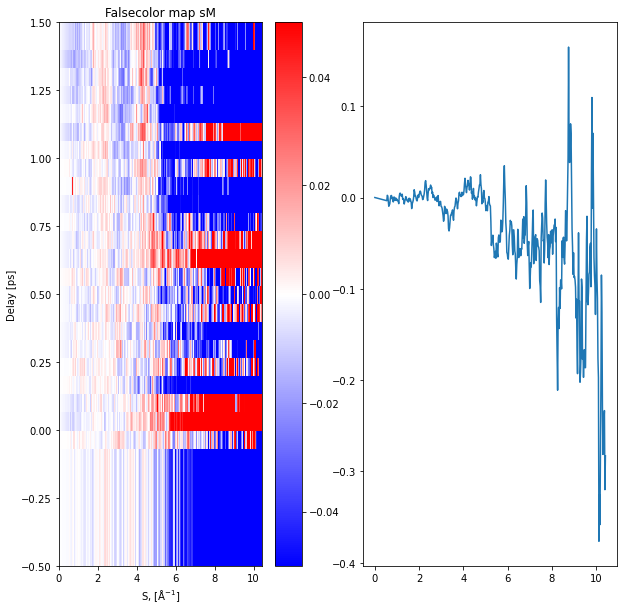

In [123]:
sM1 = sM/np.max(sM)
print(sM1.shape)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pcolor(s, realtime, sM1,cmap='bwr')
plt.clim(vmin=-0.05, vmax=0.05);
plt.colorbar()
plt.ylim(-0.5, 1.5)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map sM')

plt.subplot(1,2,2)
plt.plot(s, sM1[-1])
plt.show()

<ipython-input-120-22f992084f3c>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(s, realtime, sM_bkg_rmv,cmap='bwr')


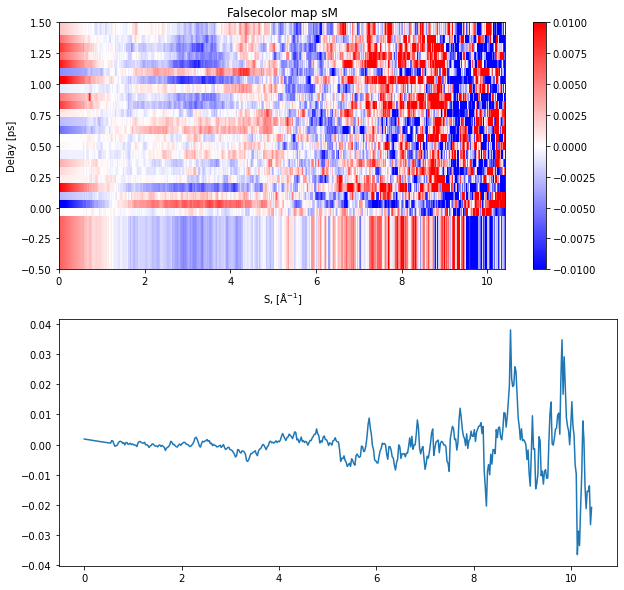

In [120]:
def poly_remove_bkg(s1,data):
    z=np.polyfit(s1,data,2)
    p=np.poly1d(z)
    Ivals=p(s1)
    bkg_removed=data-Ivals
    return bkg_removed

sM_bkg_rmv = []
for i in range(len(sM)):
    bkg_rmv = poly_remove_bkg(s, sM[i])
    sM_bkg_rmv.append(bkg_rmv)
sM_bkg_rmv = np.array(sM_bkg_rmv)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.pcolor(s, realtime, sM_bkg_rmv,cmap='bwr')
plt.clim(vmin=-0.01, vmax=0.01);
plt.colorbar()
plt.ylim(-0.5, 1.5)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map sM')

plt.subplot(2,1,2)
plt.plot(s, sM_bkg_rmv[-1])
plt.show()

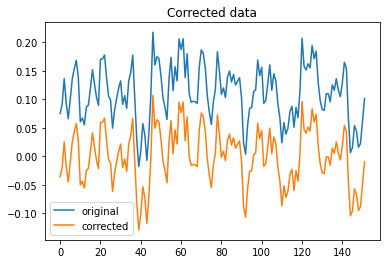

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       -4.25705345])

In [172]:
dI_corrected = correct_offset(norm_ref, norm_data)

In [ ]:

plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s,sM);
plt.xlabel(r'S, ['+angs+'$^{-1}$]');plt.ylabel('sM(s)');plt.title('Modified Scattering Intensity');plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r,PDF);
plt.xlabel(r'R, [pm]');
plt.ylabel('PDF');
plt.title('Pair Distribution Function');
plt.grid()
    
plt.tight_layout()
plt.show()